In [22]:
# 1. [전처리 전]의 데이터 셋을 전처리하여 [전처리 후] 데이터 셋으로 변경하려고 한다.
import pandas as pd

# 데이터 셋 생성
data = {
    "Name": ["Amy", "Bob", "Chad", "Dave", "Eva", "Fay"],
    "Age": [25, 30, 35, 40, 45, 50],
    "Gender": ["Female", "Male", "Male", "Male", "Female", "Female"],
    "Salary": [40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0],
}
df = pd.DataFrame(data=data)

# Gender 컬럼 변환
gender_dict = {"Female": 0, "Male": 1}
df["Gender"] = df["Gender"].apply(lambda x: gender_dict[x])

# Salary 컬럼 변환
df["Salary"] = df["Salary"]

# Name 컬럼 삭제
df = df.drop(columns="Name", axis=1)

print(df)

   Age  Gender   Salary
0   25       0  40000.0
1   30       1  50000.0
2   35       1  60000.0
3   40       1  70000.0
4   45       0  80000.0
5   50       0  90000.0


In [23]:
# 2. [전처리 전]의 데이터 셋을 전처리하여 [전처리 후] 데이터 셋으로 변경하려고 한다.
import pandas as pd
from sklearn.datasets import load_iris

# iris 데이터 셋 불러오기
iris = load_iris()

# 데이터 셋을 DataFrame으로 변환
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])

# 처음 5개 행 출력
print(df.head())

# 결측치 확인
print(df.isnull().sum())

# 결측치 0으로 대체
df = df.fillna(0)

# 처음 5개 행 출력
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4  

           dt  AverageTemperature     City Latitude Longitude
0  1849-01-01              26.704  Abidjan    5.63N     3.23W
1  1849-02-01              27.434  Abidjan    5.63N     3.23W
2  1849-03-01              28.101  Abidjan    5.63N     3.23W
3  1849-04-01              26.140  Abidjan    5.63N     3.23W
4  1849-05-01              25.427  Abidjan    5.63N     3.23W
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  239177 non-null  datetime64[ns]
 1   AverageTemperature  228175 non-null  float64       
 2   City                239177 non-null  object        
 3   Latitude            239177 non-null  object        
 4   Longitude           239177 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.1+ MB
None
dt                        0
AverageTemperat

,dt,AverageTemperature,City,Latitude,Longitude,Year,Month,Day
0,1849-01-01,26.704,Abidjan,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,Abidjan,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,Abidjan,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,Abidjan,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,Abidjan,5.63N,3.23W,1849,5,1


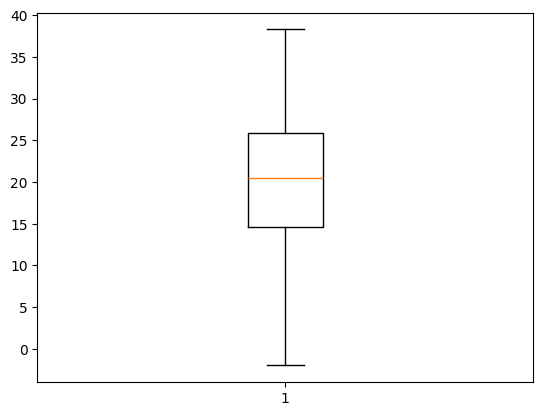

In [24]:
# 3. 다음 순서대로 데이터 전처리를 진행한 1~7의 출력 결과를 보고, 빈 곳을 채우세요.
## - 'dt' 컬럼의 데이터 타입을 datetime을 변경
## - 'City'와 'Country' 컬럼의 결측값을 해당 컬럼의 최빈값으로 대체
## - 'AverageTemperature' 컬럼의 결측값을 해당 컬럼의 평균값으로 대체
## - 'dt' 컬럼에서 년도, 월, 일자 데이터를 추출하여 'Year', 'Month', 'Day' 컬럼을 추가
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 가져오기
df = pd.read_csv("../resources/10장/연습문제10-4.csv")
print(df.head())

# (1) 'dt' 컬럼의 데이터 타입 변경
df["dt"] = pd.to_datetime(df["dt"])
print(df.info())

# (2) 'City'와 'Country' 컬럼의 결측값 대체
print(df.isnull().sum())
df[["City"]] = df[["City"]].fillna(df.mode().iloc[0])
print(df.isnull().sum())

# (3) 'AverageTemperature' 컬럼의 결측값 대체
df["AverageTemperature"] = df["AverageTemperature"].fillna(
    df["AverageTemperature"].mean()
)

# (4) 'AverageTemperature' 컬럼에서 이상치 확인
# plt.boxplot(df["AverageTemperature"])

# 'AverageTemperature' 컬럼에서 이상치 제거
df = df[df.AverageTemperature >= -2]

# 'AverageTemperature' 컬럼에서 이상치 다시 확인
plt.boxplot(df["AverageTemperature"])

# (5) 'dt' 컬럼에서 년, 월, 일 데이터 추출하여 새로운 컬럼 추가
df["Year"] = df["dt"].dt.year
df["Month"] = df["dt"].dt.month
df["Day"] = df["dt"].dt.day
df.head()